<a href="https://colab.research.google.com/github/IFBbot1/Wind_Diplom/blob/main/wind_13_04_2025%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install git+https://github.com/lgpedersen/hwm14.git

  Cloning https://github.com/lgpedersen/hwm14.git to /tmp/pip-req-build-yesa9s0g
  Running command git clone --filter=blob:none --quiet https://github.com/lgpedersen/hwm14.git /tmp/pip-req-build-yesa9s0g
  Resolved https://github.com/lgpedersen/hwm14.git to commit eaa2af228c084f4f77aacc9896519108e5bdf6f2
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [5]:
import hwm14
from hwm14 import plots
import datetime as dt


In [6]:
# при вызове задается:
#    дата - как объект dt.datetime
#    altkm: набор высот (в километрах)
#    широта (в градусах северной широты)
#    долгота (в градусах восточной долготы)
#    индекс 107 средний за 90 дней
#    индекс f107 текущий
#    индекс ap
# hwm14Obj = hwm14.run(altkm =[52.104], altstp = 1, ap = [-1, 35], day = 58, option = 1, ut = 11.66667, verbose = False, year=1993)
# hwm = HWM14Plot(profObj=windHWM)
winds = hwm14.run(dt.datetime(2025, 3, 6, 8), altkm=(250), glat=52., glon=104., f107a=150, f107=150, ap=4)

In [7]:
winds

<xarray.Dataset> Size: 24B
Dimensions:     (alt_km: 1)
Coordinates:
  * alt_km      (alt_km) float64 8B 250.0
Data variables:
    meridional  (alt_km) float64 8B 57.46
    zonal       (alt_km) float64 8B 23.15
Attributes:
    time:     2025-03-06T08:00:00
    glat:     52.0
    glon:     104.0

In [8]:
winds.to_dataframe()

,meridional,zonal
alt_km,,
250.0,57.461174,23.151981


In [9]:
winds

<xarray.Dataset> Size: 24B
Dimensions:     (alt_km: 1)
Coordinates:
  * alt_km      (alt_km) float64 8B 250.0
Data variables:
    meridional  (alt_km) float64 8B 57.46
    zonal       (alt_km) float64 8B 23.15
Attributes:
    time:     2025-03-06T08:00:00
    glat:     52.0
    glon:     104.0

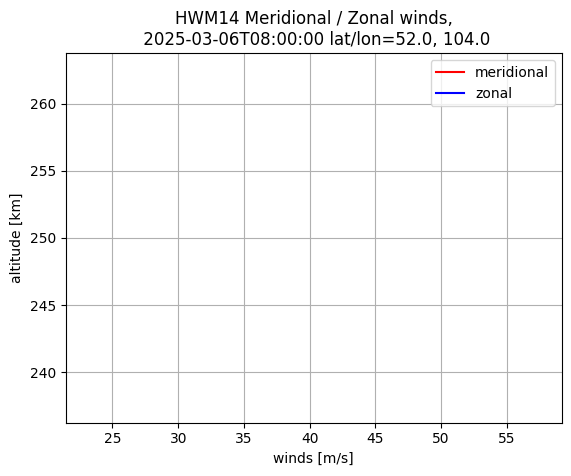

In [10]:
hwm14.plots.plothwm(winds)

In [11]:
# можно преобразовать в датафрейм pandas
import pandas as pd
df = winds.to_dataframe()

In [12]:
df

,meridional,zonal
alt_km,,
250.0,57.461174,23.151981


<Axes: xlabel='alt_km'>

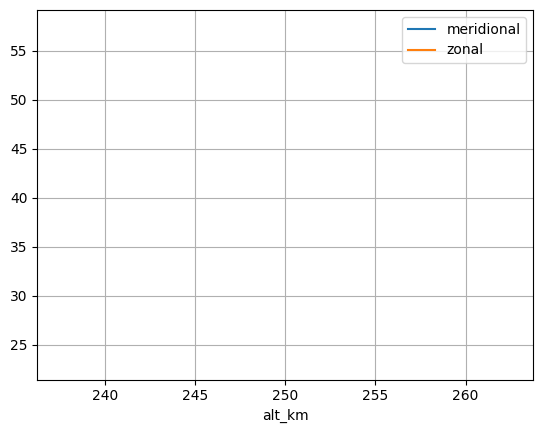

In [13]:
df.plot(grid=True)

In [61]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
def func1(dates):
  result = []
  for d in dates:
    result.append(d.hour)
  return result

In [15]:

dates = pd.date_range('2023-03-05', '2023-03-06', freq='1h')

In [16]:
func1(dates)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 0]

In [17]:
import datetime as dt
def wnd():
  windd = list()
  hours = func1(dates)
  for hour in hours:
    k = hwm14.run(dt.datetime(2023, 3, 6, hour), altkm=(250), glat=52., glon=104., f107a=158.6, f107=185., ap=14)
    w = k.to_dataframe()
    w['Hour'] = hour
    windd.append(w)
  return pd.concat(windd, ignore_index=True)
result = wnd()
grouped = result.groupby('Hour').mean()
print(grouped)

      meridional       zonal
Hour                        
0       7.643119  -83.694611
1      29.454620 -101.221786
2      39.206558 -103.756447
3      39.377209  -92.614983
4      35.977928  -73.815353
5      34.619217  -53.899628
6      37.568050  -36.026512
7      42.305222  -18.774525
8      43.147400    1.287352
9      35.619522   25.849358
10     19.894903   52.202709
11      1.069547   73.067413
12    -13.896070   79.956093
13    -20.716169   68.301392
14    -20.677467   40.729755
15    -19.312485    6.411099
16    -21.756388  -23.500292
17    -30.337139  -40.831680
18    -44.645775  -42.870956
19    -60.940742  -33.176964
20    -71.856812  -21.354965
21    -69.487381  -19.017782
22    -51.304802  -32.029930
23    -22.344238  -56.966888


In [18]:
date_index=pd.date_range(start='2014-01-01', end='2014-01-31')

<Axes: xlabel='Hour'>

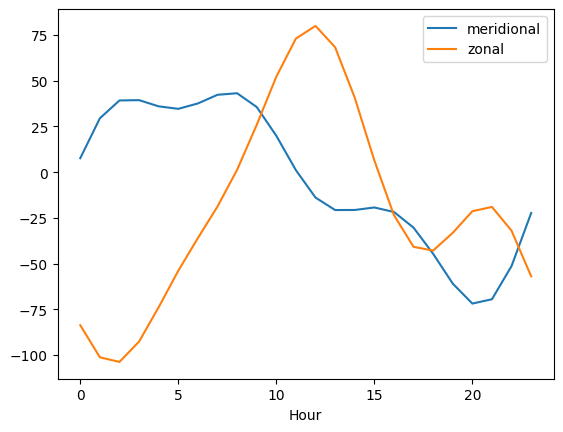

In [19]:
grouped.plot()


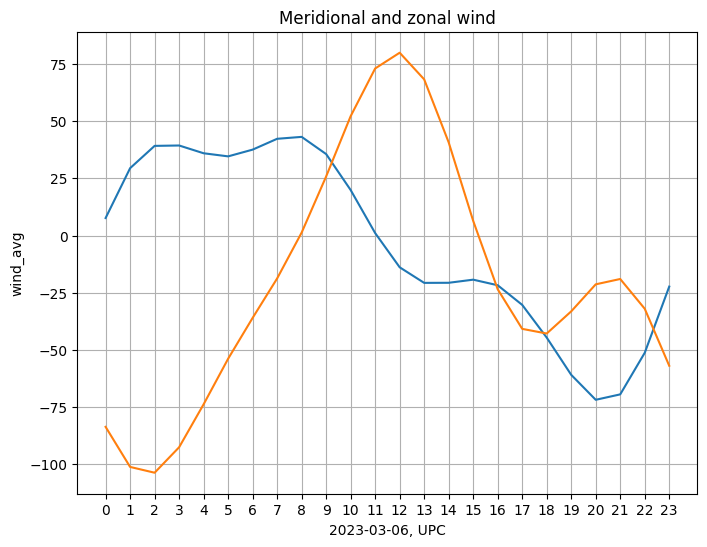

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(grouped.index, grouped['meridional'], grouped['zonal'])
plt.title('Meridional and zonal wind')
plt.xlabel('2023-03-06, UPC')
plt.ylabel('wind_avg')
plt.xticks(grouped.index)
plt.grid(True)
plt.show()

In [21]:
import pandas as pd
#ww=pd.DataFrame(windd)
data = pd.read_hdf('inds.hdf')
data

,f107,f107a,ap
2021-03-04,74.1,73.1,9
2021-03-05,73.9,73.1,4
2021-03-06,74.4,73.1,15
2021-03-07,76.4,73.1,8
2021-03-08,78.7,73.1,4
...,...,...,...
2023-12-28,141.8,153.5,1
2023-12-29,138.2,154.2,5
2023-12-30,135.1,154.6,3
2023-12-31,141.4,154.7,2


In [56]:
import pandas as pd

zonal = pd.read_csv("zonal-wind-avg-1-6300-2021--2024.tsv", delimiter='\t', parse_dates=['dat_avg2'])
zonal.set_index('dat_avg2', inplace=True)
zonal['date'] = zonal.index.date.astype(str)
zonal['hour'] = zonal.index.hour

zonal

,wind_zon_avg,wind_zon_stdev,date,hour
dat_avg2,,,,
2021-03-04 17:30:00,48.468348,0.000000,2021-03-04,17
2021-03-04 17:45:00,37.314719,0.000000,2021-03-04,17
2021-03-04 18:00:00,37.015206,5.433259,2021-03-04,18
2021-03-04 18:45:00,45.945648,0.000000,2021-03-04,18
2021-03-04 19:00:00,39.373526,0.000000,2021-03-04,19
...,...,...,...,...
2024-08-31 20:00:00,-25.939305,0.000000,2024-08-31,20
2024-08-31 20:15:00,-28.645897,0.840285,2024-08-31,20
2024-08-31 20:30:00,-18.945190,6.757009,2024-08-31,20


<Axes: xlabel='dat_avg2'>

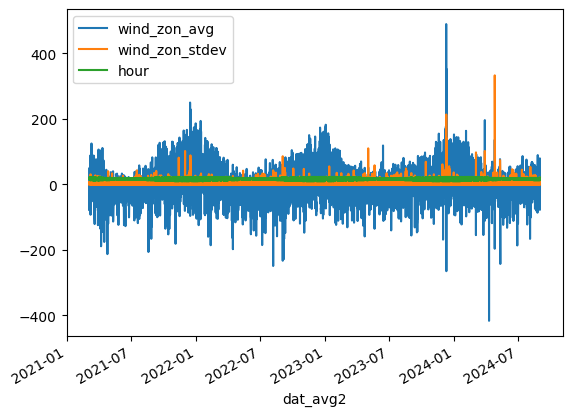

In [57]:
zonal.plot()

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
zon['date'] = pd.to_datetime(zon['date'])
oct = zon[(zon['date'].dt.year == 2023) & (zon['date'].dt.month == 10)]
zonal.to_hdf('wind.hdf', key='df', mode='w', format='table')
oct = pd.read_hdf('wind.hdf')
print(oct)

                     wind_zon_avg  wind_zon_stdev        date  hour
dat_avg2                                                           
2021-03-04 17:30:00     48.468348        0.000000  2021-03-04    17
2021-03-04 17:45:00     37.314719        0.000000  2021-03-04    17
2021-03-04 18:00:00     37.015206        5.433259  2021-03-04    18
2021-03-04 18:45:00     45.945648        0.000000  2021-03-04    18
2021-03-04 19:00:00     39.373526        0.000000  2021-03-04    19
...                           ...             ...         ...   ...
2024-08-31 20:00:00    -25.939305        0.000000  2024-08-31    20
2024-08-31 20:15:00    -28.645897        0.840285  2024-08-31    20
2024-08-31 20:30:00    -18.945190        6.757009  2024-08-31    20
2024-08-31 20:45:00     -9.377061        0.000000  2024-08-31    20
2024-08-31 21:00:00     -5.626547        0.000000  2024-08-31    21

[33667 rows x 4 columns]


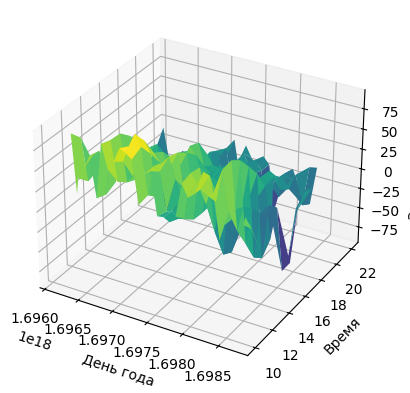

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

date_numeric = pd.to_datetime(oct['date']).map(pd.Timestamp.timestamp)
hours = oct['hour']
wind_avg_grid = oct.pivot_table(values='wind_zon_avg', index='hour', columns=oct['date'], aggfunc='mean')

x = wind_avg_grid.columns.values.astype(float)
y = wind_avg_grid.index.values
X, Y = np.meshgrid(x, y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('День года')
ax.set_ylabel('Время')
ax.set_zlabel('Значение ветра')

plt.show()

In [ ]:
mer = pd.read_csv("meridional-wind-avg-1-6300-2021--2024.tsv", delimiter = '\t', parse_dates = True)
date = pd.to_datetime(mer['dat_avg2'])
idx = pd.DatetimeIndex(date)
mer.index = idx
del mer['dat_avg2']
mer